# Homework 1

## Utilities

In [12]:
import networkx as nx
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def pdf_degrees(G):
    """computes the probability density function of degrees of G"""

    degrees = [ G.degree[v] for v in G.nodes ]
    minimum, maximum = min(degrees), max(degrees)

    pdf = np.zeros(maximum - minimum + 1)

    for d in degrees:
        pdf[d] += 1

    return np.arange(minimum, maximum + 1), pdf

def build_graph_with_probability_function(f, N):
    """
    builds a graph with N vertices and for every vertices (i, j)
    where i<j add an edge with probability f(N)
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i + 1, N):
            p = random.random()
            prob = f(N)
            if p <= prob:
                G.add_edge(i, j)

    return G

def mean_degree(G):
    return sum([ G.degree[v] for v in G.nodes ])/G.number_of_nodes()

## Exercise 1

mean degree:  4.0122


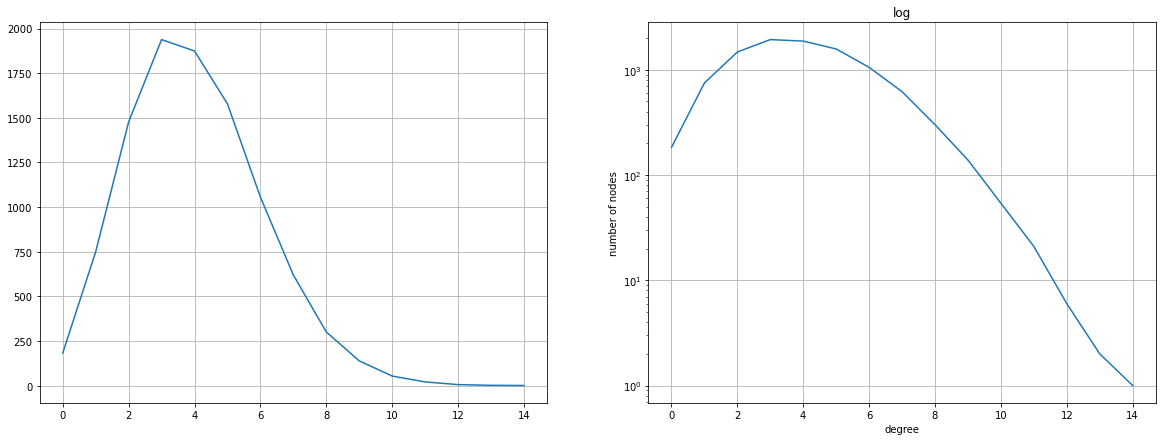

In [21]:
def exercise_1():
    N = 10000
    f = lambda N : 4./N

    G = build_graph_with_probability_function(f, N)
    print('mean degree: ', mean_degree(G))
    
    x, y = pdf_degrees(G)

    fig, (ax, ax_log) = plt.subplots(1, 2, figsize=(20, 7))
    
    ax.plot(x, y)
    ax_log.plot(x, y)
    
    ax_log.set(
        xlabel='degree',
        ylabel='number of nodes',
        title ='linear'
    )

    ax_log.set(
        xlabel='degree',
        ylabel='number of nodes',
        yscale='log',
        title ='log'
    )

    ax.grid()
    ax_log.grid()

    plt.show()

exercise_1()